In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

files =['data/anonymization_adult-NN2.npy',
        'data/anonymization_adult-NN2-Qi8.npy',
        'data/anonymization_adult-NN2-Qi10.npy',
        'data/anonymization_adult-NN2-Qi12.npy']

res = [np.load(f, allow_pickle=True) for f in files]

In [5]:
res_per_method = {k:[qi_res[1][k] for qi_res in res] for k in res[1][1].keys()}

In [6]:
def plot_mean_std(x, acc, m, k, color=None):
    accmean = acc.mean(axis=1)
    if color is None:
        ln = plt.plot(x, accmean, m, fillstyle='none', label=k)[0]
        plt.fill_between(x, accmean + acc.std(axis=1), accmean - acc.std(axis=1), color=ln.get_color(), alpha=0.5)
    else:
        ln = plt.plot(x, accmean, m, fillstyle='none', label=k, color=color)[0]
        plt.fill_between(x, accmean + acc.std(axis=1), accmean - acc.std(axis=1), color=color, alpha=0.5)

    return ln


In [7]:
qi_legends = ['4 QI', '8 QI', '10 QI', '12 QI']
k_trials = (50, 100, 200, 400, 800, 1000)
markers = ['-s', '-^', '-o', '-<']

In [8]:
len(res_per_method['AG'][0])

6

In [9]:
res[0][0][:,0]

array([0.83287269, 0.83434677, 0.83385539, 0.83754069, 0.83330262,
       0.83557522, 0.83391684, 0.83158284, 0.83668077, 0.833794  ])

In [21]:
def export_legend(legend, filename, expand=[-5,-5,5,5]):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


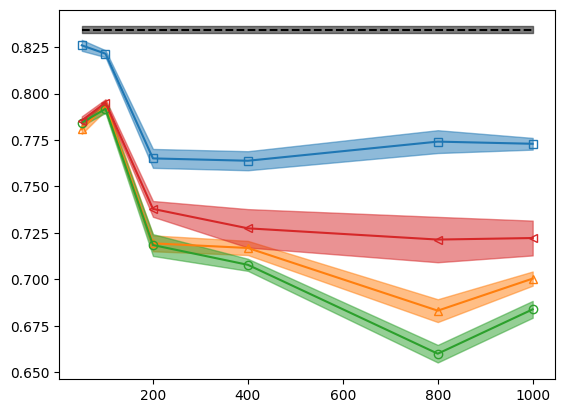

In [24]:
res_AG = res_per_method['AG']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0], m, k) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0][np.newaxis,:]),
                            '--', "Base line", color='black')

lns = lns_qi + [lns_vanilla]
legend = plt.legend(lns, qi_legends, loc=3, framealpha=1, frameon=True, ncol=4, bbox_to_anchor=(1.0, -0.05))

export_legend(legend, 'plots/legend_QIs')
legend.remove()

plt.savefig('plots/inference/anonymization_adult-NN2-QIs_AG.png')

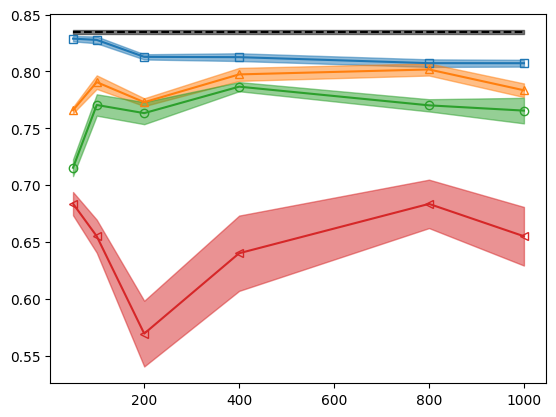

In [25]:
res_AG = res_per_method['Mondrian']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0], m, k) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0][np.newaxis,:]),
                            '--', "Base line", color='black')
#plt.legend()
plt.savefig('plots/inference/anonymization_adult-NN2-QIs_Mondrian.png')

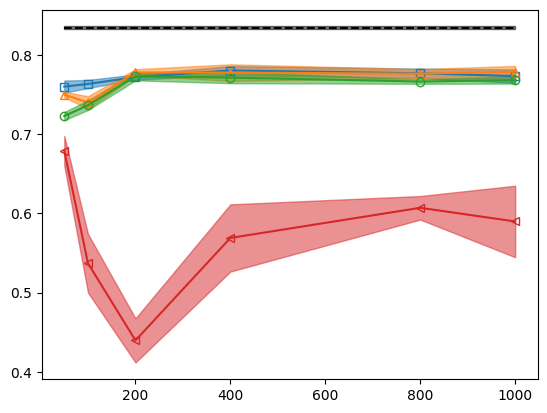

In [26]:
res_AG = res_per_method['l-diverse']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0], m, k) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0][np.newaxis,:]),
                            '--', "Base line", color='black')

plt.savefig('plots/inference/anonymization_adult-NN2-QIs_l-diverse.png')

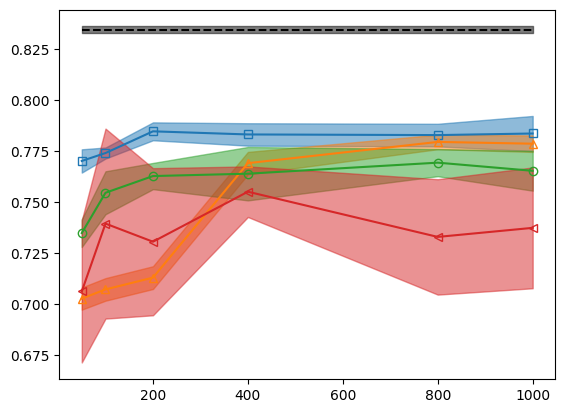

In [27]:
res_AG = res_per_method['t-closeness']

lns_qi = [plot_mean_std(k_trials, np.array(acc)[:,:,0], m, k) for (k, acc, m) in zip(qi_legends, res_AG, markers)]

lns_vanilla = plot_mean_std(k_trials, np.dot(np.ones_like(k_trials)[:,np.newaxis], res[0][0][:,0][np.newaxis,:]),
                            '--', "Base line", color='black')

plt.savefig('plots/inference/anonymization_adult-NN2-QIs_t-closeness.png')